# Worldwide data

Read the worldwide data, and then see if we can predict anything about them!

Note, cells 3 & 4 get a list of all the samples.

These lines in cell 4 are key:

```
# so far, PRJEB20836 has the best
sample_id = worldwide_samples[3]
print(f"Sample is {sample_id}", file=sys.stderr)
wwdf, wwmd = cf_analysis_lib.read_worldwide_data(sample_id)
wwdf
```

You just change the index of the `worldwide_sample_number` to reflect the one you are interested in, and restart the kernel and run all cells.

**_Note_**: There is an issue with this version, because you can't just read the pc_df and then compare it to a new pc_df. Instead, you need to create the pc_df anew based on the clusters, and fit the ww data to that trained model. 

This workbook is deprecated (hence the name), and a new version has the new approach.

In [1]:
worldwide_sample_number = 7

In [2]:
import os
import sys
from socket import gethostname

hostname = gethostname()

if hostname.startswith('hpc-node'):
    IN_DEEPTHOUGHT = True
    sys.path.append('..')
else:
    IN_DEEPTHOUGHT = False
from cf_analysis_lib.load_libraries import *
import cf_analysis_lib


# Read our data and models

This is our normal models we use for predicting everything

In [3]:
sequence_type = "MGI"
datadir = '..'
sslevel = 'subsystems_norm_ss.tsv.gz'
taxa = "family"

our_df, our_metadata = cf_analysis_lib.read_the_data(sequence_type, datadir, all_taxa=True,
                                                     sslevel='subsystems_norm_ss.tsv.gz', taxa="family")

encoder_models = 'cluster_gbrfs_eukaryotes'
if not os.path.exists(os.path.join(encoder_models, 'clusters.json')):
    print("Please run the autoencoder code before trying to load the models.", file=sys.stderr)
    exit(1)

if not os.path.exists(os.path.join(encoder_models, 'pc_df.tsv')):
    print("Please create and save the PCA before trying to load the models.", file=sys.stderr)
    exit(1)

with open(os.path.join(encoder_models, 'clusters.json'), 'r') as file:
    data = json.load(file)
tmpjsondf = pd.DataFrame(list(data.items()), columns=['Cluster', 'Feature'])
cluster_assignments = tmpjsondf.explode('Feature').reset_index(drop=True)
cluster_assignments['Cluster'] = cluster_assignments['Cluster'].astype(int)

pc_df = pd.read_csv(os.path.join(encoder_models, 'pc_df.tsv'), sep="\t", index_col=0)
pc_df.shape

(127, 300)

# Read one of the data sets

Samples: 
['PRJNA1081394', 'PRJNA516442', 'PRJEB51171', 'PRJNA71831', 'PRJEB20836', 'PRJNA516870', 'PRJNA1126024', 'PRJEB14440', 'PRJEB32062', 'PRJEB54014', 'PRJNA1055940', 'PRJNA1091195', 'PRJNA1101448', 'PRJNA316056', 'PRJNA316588', 'PRJNA510441', 'PRJNA615628', 'PRJNA644285', 'PRJNA825831', 'PRJNA839435', 'PRJNA846291', 'PRJNA931830']

Initially, lets see what's there?

In [4]:
worldwide_samples = cf_analysis_lib.worldwide_samples()
print(f"There are {len(worldwide_samples)}")
print(worldwide_samples)

There are 24
['PRJNA1081394', 'PRJNA516442', 'PRJEB51171', 'PRJNA71831', 'PRJEB20836', 'PRJNA516870', 'PRJNA1126024', 'PRJEB14440', 'PRJEB32062', 'PRJEB54014', 'PRJNA1055940', 'PRJNA1091195', 'PRJNA1101448', 'PRJNA316056', 'PRJNA316588', 'PRJNA510441', 'PRJNA615628', 'PRJNA644285', 'PRJNA825831', 'PRJNA839435', 'PRJNA846291', 'PRJNA931830', 'not_analysed', 'papers']


### Next steps. 

We are working through these one at a time and summarising the results in both WorldWideCF and the README.md in each samples directory.

In [5]:
# so far, PRJEB20836 has the best
sample_id = worldwide_samples[worldwide_sample_number]
cf_analysis_lib.show_green(title="Analysis Report", message=f"Analysing: {sample_id}")
os.makedirs(os.path.join("img", "worldwide", sample_id, "img"), exist_ok=True)
print(f"Sample is {sample_id}", file=sys.stderr)
wwdf, wwmd = cf_analysis_lib.read_worldwide_data(sample_id, verbose=True)
wwdf

Sample is PRJEB14440
Reading subsystems from ../WorldWideDataAnalysis/Atavide/PRJEB14440/subsystems/PRJEB14440_subsystems_norm_ss.tsv.gz
Before dropping suspects, shape is (603, 5) and after is (603, 5)
Read 5 samples and 603 subsystems
Reading taxonomy from ../WorldWideDataAnalysis/Atavide/PRJEB14440/taxonomy_summary/PRJEB14440_family.norm.tsv.gz
Read 5 samples and 735 family
Read 5 samples and 7 metadata columns


,"2,3-diacetamido-2,3-dideoxy-d-mannuronic acid",2-O-alpha-mannosyl-D-glycerate utilization,2-aminophenol Metabolism,2-ketoacid oxidoreductases disambiguation,2-oxoglutarate dehydrogenase,2-phosphoglycolate salvage,3-amino-5-hydroxybenzoic Acid Synthesis,5-methylaminomethyl-2-thiouridine,A Hypothetical Protein Related to Proline Metabolism,A new toxin - antitoxin system,...,Zingiberaceae,Closteriaceae,Hypsibiidae,Piptocephalidaceae,Circoviridae,Inoviridae,Orthoherpesviridae,Aliceevansviridae,Peduoviridae,Straboviridae
ERR1457158,0.000000,108.690903,946.250217,12.787165,631.899075,901.495139,319.679127,1374.620248,268.530467,0.000000,...,0.000000,5.344507,0.000000,5.344507,0.000000,7.126009,0.000000,0.000000,0.000000,1.781502
ERR1457159,729.449667,9.146704,1033.577584,242.387664,553.451832,968.407316,480.201975,1273.678572,336.141382,123.480508,...,0.000000,2.379038,0.000000,0.000000,0.000000,30.927492,0.000000,0.000000,86.834881,0.000000
ERR1457160,909.928410,0.000000,1060.264408,7.912421,729.920833,832.782305,398.917890,1404.454719,208.360418,0.000000,...,4.518804,6.778206,2.259402,0.000000,0.000000,0.000000,0.000000,2.259402,539.997063,0.000000
ERR1457161,884.370363,100.117400,1051.232695,41.715583,731.413225,596.532839,486.681803,1735.368259,241.950382,0.000000,...,0.000000,4.946871,0.000000,0.000000,4.946871,9.893741,0.000000,0.000000,0.000000,0.000000
ERR1457162,913.813505,211.460976,1193.244081,0.000000,549.798538,1004.439638,368.798012,679.695995,299.569716,0.000000,...,0.000000,4.300779,0.000000,0.000000,0.000000,21.503897,34.406234,0.000000,0.000000,0.000000


In [6]:
# print run counts
run_counts = {"PRJEB14440": "- The entire data set is 5 runs, and 1,330,576,074 bp", "PRJEB20836": "- The entire data set is 1396 runs, and 1,007,979,034,098 bp", "PRJEB32062": "- The entire data set is 27 runs, and 113,773,728,053 bp", "PRJEB51171": "- The entire data set is 64 runs, and 29,874,922,519 bp", "PRJEB54014": "- The entire data set is 80 runs, and 447,488,092,200 bp", "PRJNA1055940": "- The entire data set is 61 runs, and 386,942,064,540 bp", "PRJNA1081394": "- The entire data set is 549 runs, and 510,156,291,748 bp", "PRJNA1091195": "- The entire data set is 44 runs, and 146,735,286,366 bp", "PRJNA1101448": "- The entire data set is 323 runs, and 89,493,823,284 bp", "PRJNA1126024": "- The entire data set is 2 runs, and 1,071,033,642 bp", "PRJNA316056": "- The entire data set is 12 runs, and 36,012,000,000 bp", "PRJNA316588": "- The entire data set is 18 runs, and 121,257,187,412 bp", "PRJNA510441": "- The entire data set is 14 runs, and 906,511,907 bp", "PRJNA516442": "- The entire data set is 93 runs, and 34,371,719,753 bp", "PRJNA516870": "- The entire data set is 79 runs, and 39,170,766,613 bp", "PRJNA615628": "- The entire data set is 71 runs, and 95,889,827,074 bp", "PRJNA644285": "- The entire data set is 12 runs, and 29,679,938,510 bp", "PRJNA71831": "- The entire data set is 38 runs, and 1,179,409,307 bp", "PRJNA825831": "- The entire data set is 117 runs, and 58,764,823,681 bp", "PRJNA839435": "- The entire data set is 12 runs, and 8,336,976,960 bp", "PRJNA846291": "- The entire data set is 98 runs, and 87,154,850,753 bp", "PRJNA931830": "- The entire data set is 260 runs, and 740,690,138,100 bp"}
cf_analysis_lib.show_green(title="Analysis Report", message=f"{run_counts[sample_id]} (including amplicon sequences)")

In [7]:
cf_analysis_lib.show_green(title="Analysis Report", message=f"- We analysed {len(wwdf.index)} metagenomic sequence runs.")


# Convert the raw data into clusters.

We combined all the data for each cluster, and then create a 1-Dimensional PCA for that cluster to store as the data representation.

In [8]:
pca = PCA(n_components=1)
grouped = cluster_assignments.groupby("Cluster")
ww_pc_df = pd.DataFrame(index=wwdf.index, columns=[f"Cluster {x+1}" for x in range(len(grouped.size()))])
all_features = 0
kept_features = 0
for cluster_id, group in grouped:
    valid_features = [f for f in group["Feature"] if f in wwdf.columns]
    kept_features += len(valid_features)
    all_features += len(group['Feature'])
    df_clust = wwdf[valid_features]
    if len(df_clust.columns) > 0:
        ww_pc_df[f"Cluster {cluster_id}"] = pca.fit_transform(df_clust).ravel()
    else:
        ww_pc_df[f"Cluster {cluster_id}"] = [0] * len(df_clust)

print(f"Kept {kept_features} out of {all_features} total ({kept_features/all_features*100:.2f}%)", file=sys.stderr)
ww_pc_df

Kept 1280 out of 2626 total (48.74%)


,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,...,Cluster 291,Cluster 292,Cluster 293,Cluster 294,Cluster 295,Cluster 296,Cluster 297,Cluster 298,Cluster 299,Cluster 300
ERR1457158,-316.080897,-74.668114,300.364527,-1792.102838,-154.562220,-138.777309,261.866981,90.851864,-38.466775,556.501101,...,2231.076166,-2.071746,-3249.577451,-36.534521,-0.328830,-1.937518,62.822219,229.685581,232.475107,-2.726863
ERR1457159,-5.027576,5.548687,16.036017,-916.368510,122.802993,-0.735434,-102.631355,-106.624909,117.535211,-307.310710,...,-654.946464,-2.137944,-3358.017848,-54.304576,-10.254170,19.490479,-11.121096,-275.882854,-120.143291,8.322988
ERR1457160,-121.394556,147.914019,-61.676030,-2453.956860,-133.232975,-301.897009,-79.693190,-130.280346,-506.482952,-270.382415,...,-273.466444,-1.874383,-3413.950736,-129.354978,-18.892081,-5.848326,14.353807,126.522837,106.144111,-9.674943
ERR1457161,755.393330,-19.126265,44.074975,3070.726335,36.107320,130.030696,31.355920,81.628957,150.452246,362.590062,...,-662.083577,7.958457,2050.962227,-42.243535,49.077737,-7.679661,-30.618479,-282.215003,-43.614922,25.769928
ERR1457162,-312.890300,-59.668328,-298.799489,2091.701874,128.884882,311.379056,-110.898356,64.424434,276.962270,-341.398038,...,-640.579681,-1.874383,7970.583807,262.437610,-19.602655,-4.024973,-35.436451,201.889439,-174.861005,-21.691111


# Scale the data frames. 

We use a min/max scaler since all the PCAs have different units. This normalises all the data.

In [65]:
# scaler = StandardScaler() # - not good because too many values at 0
scaler = RobustScaler() 
# scaler = MinMaxScaler() 

# train the scaler on pc_df and then apply the _same scalar_ to ww_pc_df

trained_scaler = scaler.fit(pc_df)

pc_scaled = pd.DataFrame(
    trained_scaler.transform(pc_df),
    index=pc_df.index,
    columns=pc_df.columns
)

ww_pc_scaled = pd.DataFrame(
    trained_scaler.transform(ww_pc_df),
    index=ww_pc_df.index,
    columns=ww_pc_df.columns
)

In [66]:
print(f"Ori: min: {min(pc_scaled['Cluster 56']):.2f} max: {max(pc_scaled['Cluster 56']):.2f}")
print(f"New: min: {min(ww_pc_scaled['Cluster 56']):.2f} max: {max(ww_pc_scaled['Cluster 56']):.2f}")

Ori: min: -0.58 max: 114.95
New: min: -2.14 max: 9.73


# Build the GBRF with our data first

This is from our separate model analyses

In [67]:
#intcol = 'Pseudomonas Culture' # note these two columns have the same information, but 'CS_Pseudomonas aeruginosa' is a category, while 'Pseudomonas culture' is a float!
intcol = 'CS_Pseudomonas aeruginosa'

intcol_title = replace_index.sub('', intcol).replace('_', ' ')
merged_df = pc_scaled.join(our_metadata[[intcol]]).dropna(subset=intcol)

categorical_data, custom_labels = cf_analysis_lib.create_custom_labels(our_metadata, intcol, merged_df)

X = merged_df.drop(intcol, axis=1)
y = merged_df[intcol]

if categorical_data:
  model, mse, feature_importances_sorted = cf_analysis_lib.gb_classifier_model(X, y, n_estimators=1000, n_iter_no_change=20)
  met = 'classifier'
else:
  model, mse, feature_importances_sorted = cf_analysis_lib.gb_regressor_model(X, y)
  met = 'regressor'

print(f"We used {model.n_estimators_} estimators for the random forest {met}", file=sys.stderr)

We used 437 estimators for the random forest classifier


## Apply our model to the new data

We use the model from the GBRF to predict the outcomes based on the clustered data.


In [68]:
predictions = model.predict(ww_pc_scaled)
perc = predictions.sum()/len(predictions) * 100
cf_analysis_lib.show_green(title="Analysis Report", message=f"- We predicted {predictions.sum()} samples out of {len(predictions)} ({perc:0.1f}%) have _Pseudomonas aeruginosa_")
predictions

array([0, 0, 0, 0, 0])

In [20]:
# how confident are we in our predictions?
def confidence_label(prob, threshold_low=0.6, threshold_high=0.8):
    if prob < threshold_low:
        return "Low"
    elif prob < threshold_high:
        return "Medium"
    else:
        return "High"

In [18]:
probs = model.predict_proba(ww_pc_scaled)
print(probs)

[[0.41594339 0.58405661]
 [0.70859822 0.29140178]
 [0.41437353 0.58562647]
 [0.579959   0.420041  ]
 [0.43794212 0.56205788]]


In [27]:
pred_class = np.argmax(probs, axis=1)
pred_conf = probs[np.arange(len(probs)), pred_class]
label_map = {0: "Negative", 1: "Positive"}

# Confidence labels
confidence = [confidence_label(p) for p in pred_conf]

output = ["Sample | Pseudomonas Prediction | Confidence | Certainty\n --- | --- | --- | ---"]

for i, (cls, conf, label) in enumerate(zip(pred_class, pred_conf, confidence)):
    output.append(f"{ww_pc_scaled.index[i]} | {label_map[cls]} | {conf:.2f} | {label}")
cf_analysis_lib.show_green(title="Analysis Report", message="\n".join(output))

,Cluster 56
ERR1457158,0.064792
ERR1457159,-0.013453
ERR1457160,0.089266
ERR1457161,0.043691
ERR1457162,0.034282


In [43]:
max(pc_scaled['Cluster 56'])

1.0

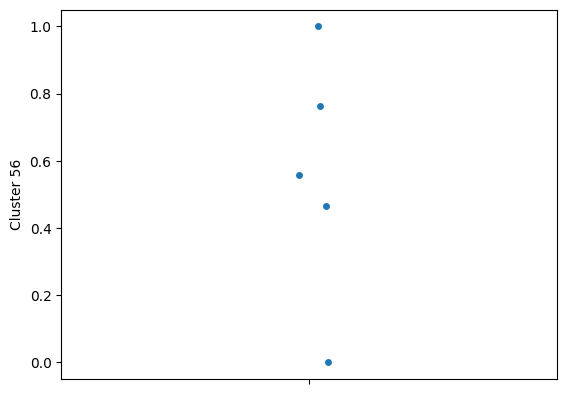

In [32]:
g = sns.stripplot(data=ww_pc_scaled, y='Cluster 56', dodge=True, jitter=True)

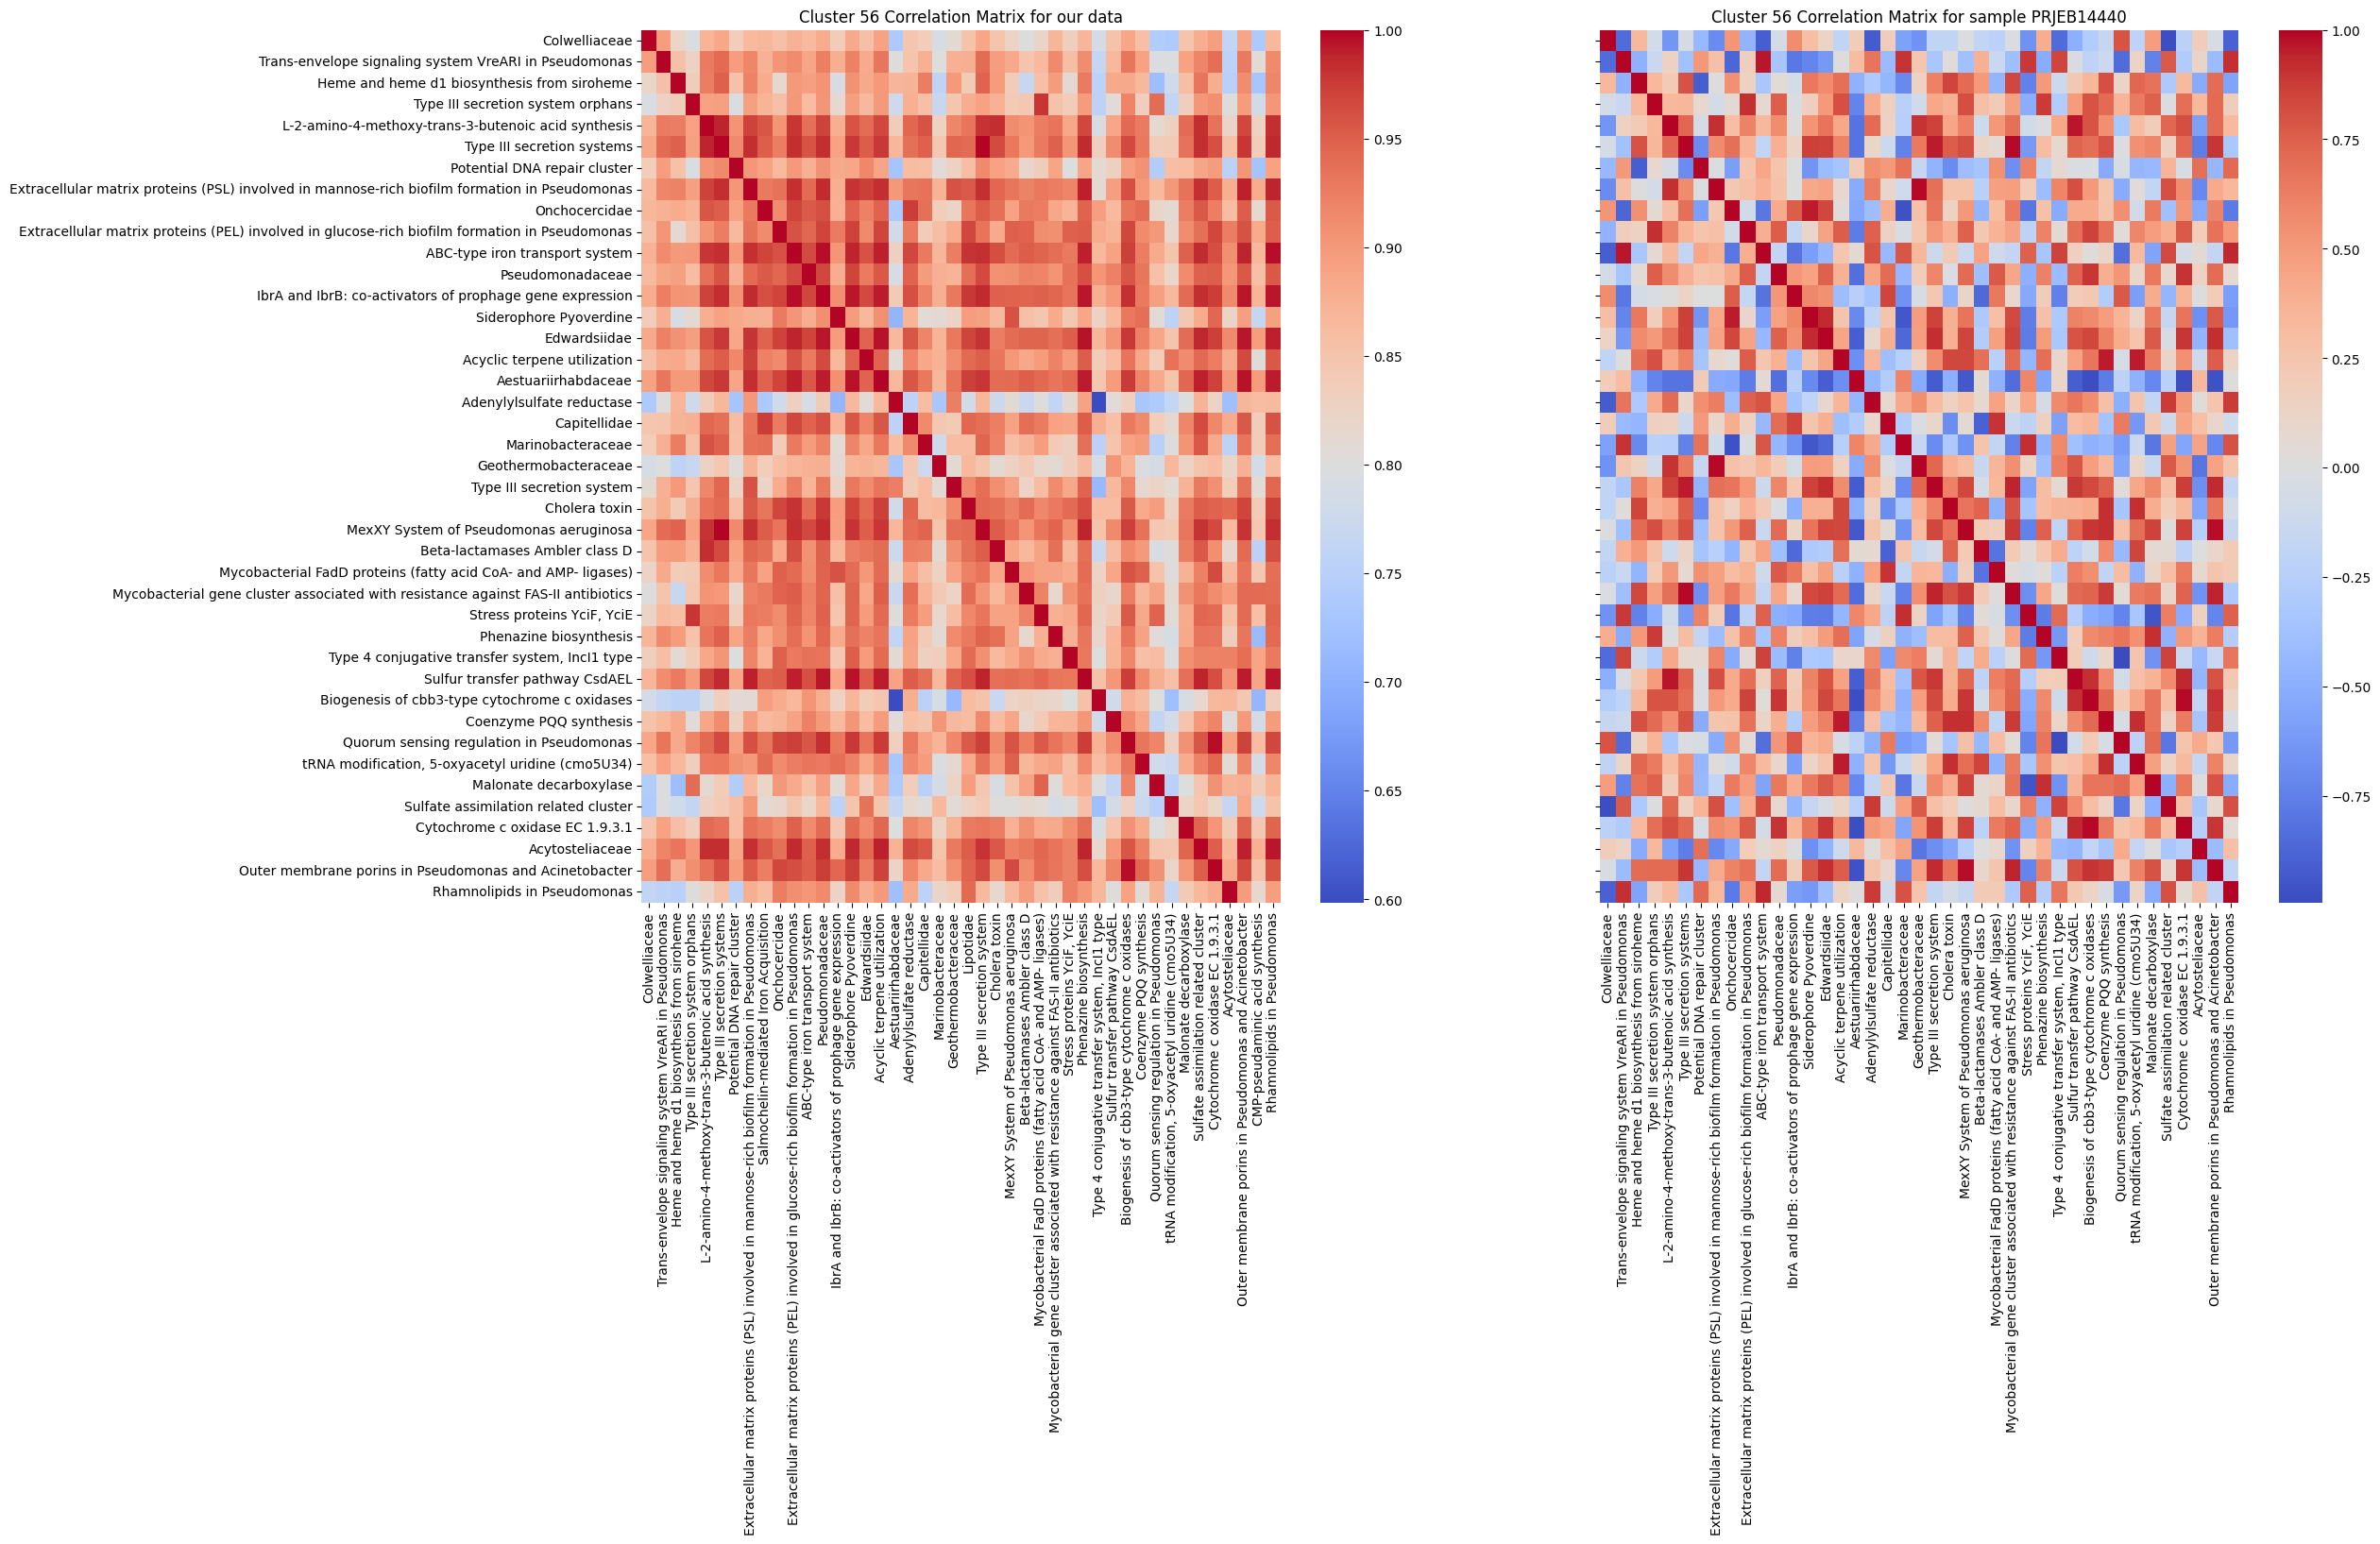

In [13]:
interesting_cluster = 56
fig, axes = plt.subplots(figsize=(24, 12), nrows=1, ncols=2, sharex=False, sharey=True)

df_clust = our_df[cluster_assignments.loc[cluster_assignments["Cluster"] == interesting_cluster, "Feature"]]
df_clust_corr = df_clust.corr()
g = sns.heatmap(df_clust_corr, ax=axes[0], annot=False, cmap='coolwarm')
g.set_title(f'Cluster {interesting_cluster} Correlation Matrix for our data')

valid_features = [f for f in cluster_assignments.loc[cluster_assignments["Cluster"] == interesting_cluster, "Feature"] if f in wwdf.columns]
df_clust = wwdf[valid_features]
df_clust_corr = df_clust.corr()

sns.heatmap(df_clust_corr, ax=axes[1], annot=False, cmap='coolwarm')
plt.title(f'Cluster {interesting_cluster} Correlation Matrix for sample {sample_id}')

plt.show()

# Plot a t-SNE of our data and the worldwide data

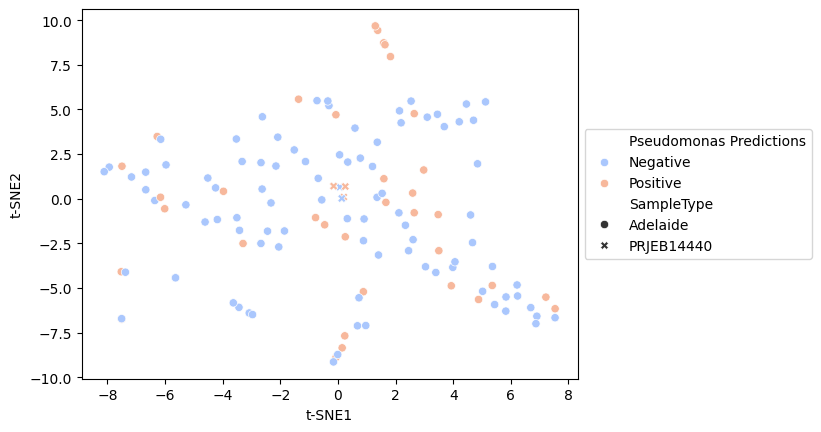

In [14]:
X_combined = np.vstack([pc_df, ww_pc_df])
sample_labels = (["Adelaide"] * len(our_df)) + ([sample_id] * len(wwdf))
group_labels = list(our_metadata[intcol]) + list(predictions)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X_combined)

df_tsne = pd.DataFrame(tsne_result, columns=["TSNE1", "TSNE2"])
df_tsne["SampleType"] = sample_labels  # Or use group_labels
df_tsne["Pseudomonas Predictions"] = group_labels  # Or use group_labels
df_tsne['Pseudomonas Predictions'] = df_tsne['Pseudomonas Predictions'].map({0: 'Negative', 1: 'Positive'})

# Basic comparison: New vs Original
g = sns.scatterplot(data=df_tsne, x="TSNE1", y="TSNE2", palette='coolwarm', style="SampleType", hue="Pseudomonas Predictions")
g.set_xlabel("t-SNE1")
g.set_ylabel("t-SNE2")
#plt.title(f"t-SNE of Adelaide and {sample_id} Samples")
plt.title("")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

imgout = os.path.join("img", "worldwide", sample_id, "img", f"{sample_id}_Pseudomonas_tSNE.png")
plt.savefig(imgout)
cf_analysis_lib.show_green(title="Analysis Report", message=f"## t-SNE\n![Comparison of Adelaide and {sample_id} samples by t-SNE](img/{sample_id}_Pseudomonas_tSNE.png 'Fig. t-SNE of all the analysed sequence data coloured by whether Pseudomonas is predicted')")

plt.show()

# Create a PCA of all the data

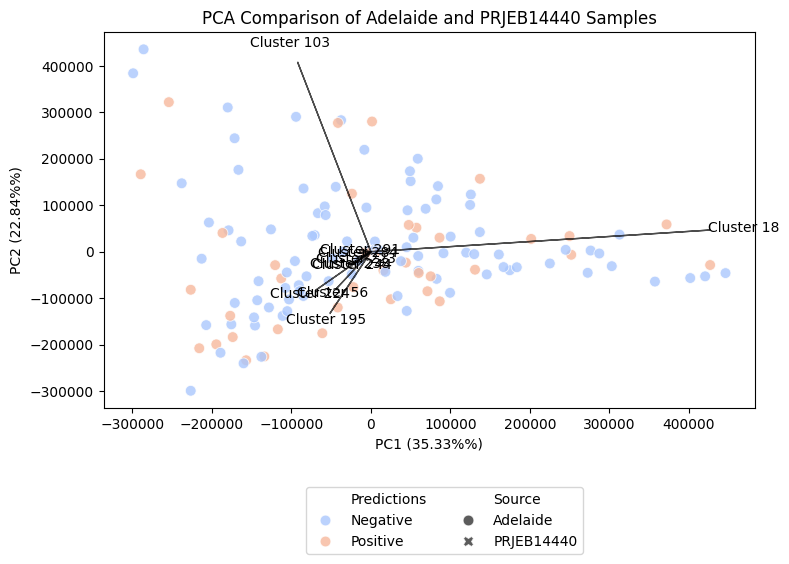

In [15]:
pca_model = PCA(n_components=2)
pca_combined_result = pca_model.fit_transform(X_combined)

# Put into DataFrame for plotting
pca_combined_df = pd.DataFrame(pca_combined_result, columns=["PC1", "PC2"])
pca_combined_df["Source"] = (["Adelaide"] * len(our_df)) + ([sample_id] * len(wwdf))
pca_combined_df["Predictions"] = list(our_metadata[intcol]) + list(predictions)
pca_combined_df["Predictions"] = pca_combined_df["Predictions"].map({0: 'Negative', 1: 'Positive'})

pca_combined_df['IDS'] = list(our_metadata.index) + list(wwdf.index)

custom_labels = {0.0: 'No', 1.0: 'Yes'}

# Get the loadings (contributions of each original variable to the PCs)
loadings = pd.DataFrame(pca_model.components_.T, 
                        index=pc_df.columns, 
                        columns=["PC1", "PC2"])

# Scale arrows for better visibility
arrow_scale = 450000

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=pca_combined_df, x="PC1", palette='coolwarm',
                y="PC2", style="Source", hue='Predictions', alpha=0.8, s=60)
plt.title(f"PCA Comparison of Adelaide and {sample_id} Samples")
plt.xlabel(f"PC1 ({pca_model.explained_variance_ratio_[0]:.2%}%)")
plt.ylabel(f"PC2 ({pca_model.explained_variance_ratio_[1]:.2%}%)")
# Plot top N most important loadings (e.g., based on magnitude of PC1^2 + PC2^2)
top_features = loadings.pow(2).sum(axis=1).sort_values(ascending=False).head(10).index

for feature in top_features:
    x = loadings.loc[feature, "PC1"]
    y = loadings.loc[feature, "PC2"]
    plt.arrow(0, 0, x * arrow_scale, y * arrow_scale,
              color='black', alpha=0.7, head_width=0.02)
    plt.text(x * arrow_scale * 1.1, y * arrow_scale * 1.1, feature,
             color='black', ha='center', va='center', fontsize=10)

plt.legend(loc='center left', ncol=2, bbox_to_anchor=(0.3, -0.3))

plt.tight_layout()
plt.show()


# Plot a PCA of just the "Pseudomonas" Cluster

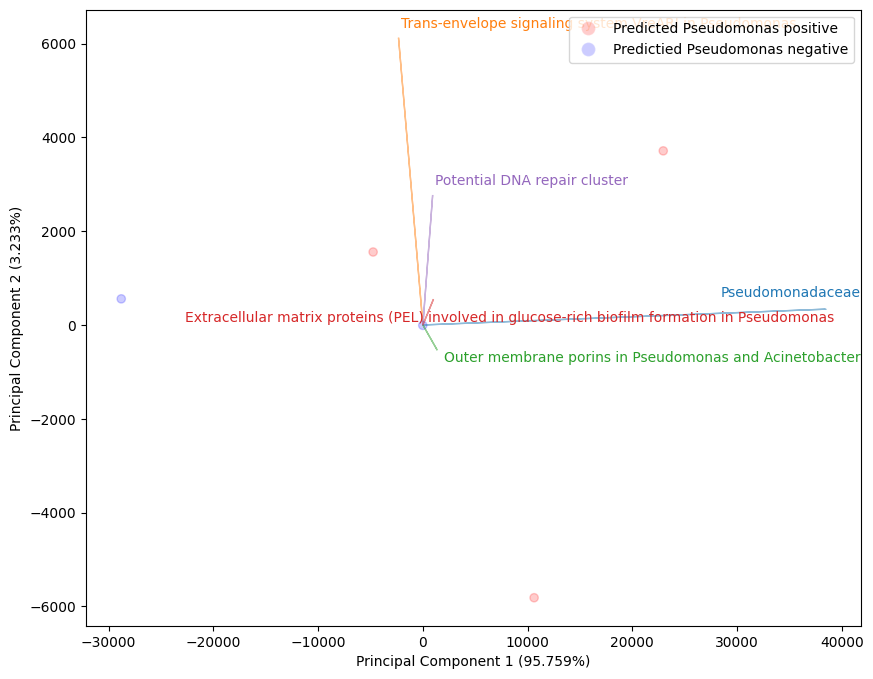

In [16]:
pca = PCA(n_components=2)

intcol = 'Pseudomonas Culture'
valid_features = [f for f in cluster_assignments.loc[cluster_assignments["Cluster"] == interesting_cluster, "Feature"] if f in wwdf.columns]
df_clust = wwdf[valid_features]

pca_result = pca.fit_transform(df_clust)
pca_df = pd.DataFrame(data=pca_result, index=wwdf.index, columns=['PC1', 'PC2'])

# Get loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=df_clust.columns, columns=['PC1', 'PC2'])

# Create a DataFrame for top loadings
top_loadings_df = loadings_df.loc[loadings_df['PC1'].abs().sort_values(ascending=False).index]
top_loadings_df.head()

explained_variance = pca.explained_variance_ratio_ * 100
pc1_variance = explained_variance[0]
pc2_variance = explained_variance[1]


# don't forget to change the legend
intcol_neg = 0
colours = np.where(predictions == intcol_neg, 'blue', 'red')

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colours, alpha=0.2)
#plt.title(f"PCA of the 'Pseudomonas' cluster (#56) in {sample_id}")
plt.title("")
plt.xlabel(f'Principal Component 1 ({pc1_variance:.3f}%)')
plt.ylabel(f'Principal Component 2 ({pc2_variance:.3f}%)')

# add the loadings ... we only plot maxloadings here
maxloadings = 5
if len(loadings) < maxloadings:
    maxloadings = len(loadings)

plotscaler = 2
texts = []
colour_cycle = cycle(mcolors.TABLEAU_COLORS)
found_pseudomonas = False
for i in range(maxloadings):
    c = next(colour_cycle)
    xpos = top_loadings_df.iloc[i, 0]*plotscaler
    ypos = top_loadings_df.iloc[i, 1]*plotscaler
    plt.arrow(0, 0, xpos, ypos, 
              color=c, alpha=0.5, width=0.05)
    texts.append(plt.text(xpos, ypos, top_loadings_df.index[i], color=c))

adjust_text(texts)


# Add a legend
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Predicted Pseudomonas positive', 
                         markerfacecolor='red', alpha=0.2, markersize=10)
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Predictied Pseudomonas negative', 
                        markerfacecolor='blue', alpha=0.2, markersize=10)


plt.legend(handles=[blue_patch, red_patch])

imgout = os.path.join("img", "worldwide", sample_id, "img", f"{sample_id}_Pseudomonas_PCA.png")
plt.savefig(imgout)
cf_analysis_lib.show_green(title="Analysis Report", message=f"## PCA\n![This cluster of features are most strongly associated with the presence of Pseudomonas](img/{sample_id}_Pseudomonas_PCA.png 'Fig. PCA of the cluster of features most strongly associated with Pseudomonas colonization in {sample_id}')")
# Show the plot
plt.show()

## Just compare cluster 56

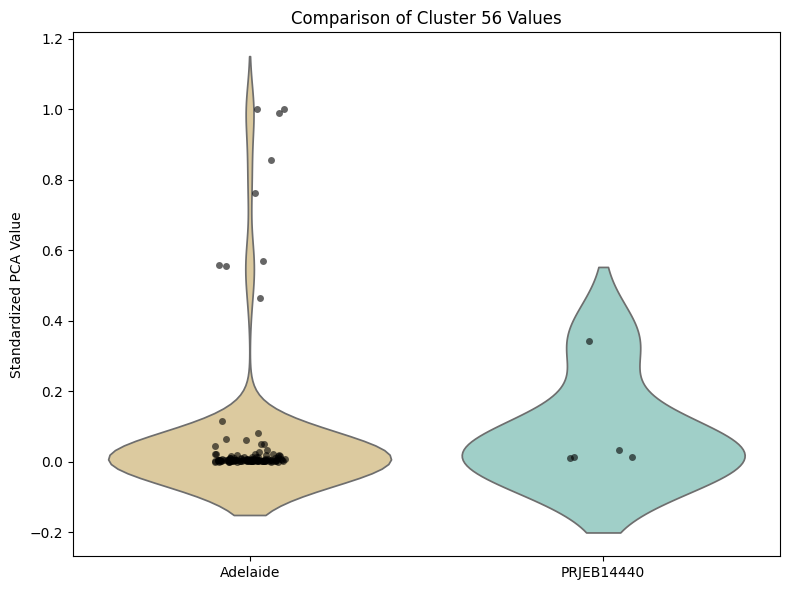

In [17]:
plot_df = pd.DataFrame({
    "Value": pd.concat([ww_pc_scaled["Cluster 56"], pc_scaled["Cluster 56"]], axis=0),
    "Dataset": (["Adelaide"] * len(pc_scaled)) + ([sample_id] * len(ww_pc_scaled))
})


plt.figure(figsize=(8, 6))

# Choose one:
# Boxplot + jitter
#sns.boxplot(data=plot_df, x="Dataset", y="Value", whis=1.5, palette="pastel")
#sns.stripplot(data=plot_df, x="Dataset", y="Value", jitter=True, color="k", alpha=0.6)

# Or Violin plot + jitter
sns.violinplot(data=plot_df, x="Dataset", palette='BrBG', y="Value", inner=None)
sns.stripplot(data=plot_df, x="Dataset", y="Value", jitter=True, color="k", alpha=0.6)

plt.title("Comparison of Cluster 56 Values")
plt.ylabel("Standardized PCA Value")
plt.xlabel("")
plt.tight_layout()
plt.show()